## Taxi Fare Estimation Project:

New York City TLC is an agency responsible for licensing and regulating New York City's taxi cabs and for-hire vehicles.
The agency has partnered with us to develop a regression model that helps estimate taxi fares before the ride, based on data that TLC has gathered. 

The TLC data comes from over 200,000 taxi and limousine licensees, making approximately one million combined trips per day. 

Note: This project's dataset was created for pedagogical purposes and may not be indicative of New York City taxi cab riders' behavior.

### Exploratory Data Analysis

### Discover data set

In [1]:
# Imports
# Data Manipulation
import numpy as np
import pandas as pd
# Data Visualization
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv(r"C:\Users\yorgh\Documents\Course Materials\Google Advanced Data Analytics Course\Datasets Exercise\Automatidata project\2017_Yellow_Taxi_Trip_Data.csv")

In [3]:
df.describe()

,Unnamed: 0,VendorID,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
count,2.269900e+04,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000
mean,5.675849e+07,1.556236,1.642319,2.913313,1.043394,162.412353,161.527997,1.336887,13.026629,0.333275,0.497445,1.835781,0.312542,0.299551,16.310502
std,3.274493e+07,0.496838,1.285231,3.653171,0.708391,66.633373,70.139691,0.496211,13.243791,0.463097,0.039465,2.800626,1.399212,0.015673,16.097295
min,1.212700e+04,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,-120.000000,-1.000000,-0.500000,0.000000,0.000000,-0.300000,-120.300000
25%,2.852056e+07,1.000000,1.000000,0.990000,1.000000,114.000000,112.000000,1.000000,6.500000,0.000000,0.500000,0.000000,0.000000,0.300000,8.750000
50%,5.673150e+07,2.000000,1.000000,1.610000,1.000000,162.000000,162.000000,1.000000,9.500000,0.000000,0.500000,1.350000,0.000000,0.300000,11.800000
75%,8.537452e+07,2.000000,2.000000,3.060000,1.000000,233.000000,233.000000,2.000000,14.500000,0.500000,0.500000,2.450000,0.000000,0.300000,17.800000
max,1.134863e+08,2.000000,6.000000,33.960000,99.000000,265.000000,265.000000,4.000000,999.990000,4.500000,0.500000,200.000000,19.100000,0.300000,1200.290000


### Comments:
1 Trip distance = 0  
2 Ratecode ID > 6 (99)  
3 fare_amount,Extra,mta_tax,improvement_surcharge,total_amount < 0  
4 Find outliers in the fare_amount or total_amount (max= 999.9/median=13.2)

In [4]:
df.info()
df['tpep_pickup_datetime']=pd.to_datetime(df['tpep_pickup_datetime'])
df['tpep_dropoff_datetime']=pd.to_datetime(df['tpep_dropoff_datetime'])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22699 entries, 0 to 22698
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             22699 non-null  int64  
 1   VendorID               22699 non-null  int64  
 2   tpep_pickup_datetime   22699 non-null  object 
 3   tpep_dropoff_datetime  22699 non-null  object 
 4   passenger_count        22699 non-null  int64  
 5   trip_distance          22699 non-null  float64
 6   RatecodeID             22699 non-null  int64  
 7   store_and_fwd_flag     22699 non-null  object 
 8   PULocationID           22699 non-null  int64  
 9   DOLocationID           22699 non-null  int64  
 10  payment_type           22699 non-null  int64  
 11  fare_amount            22699 non-null  float64
 12  extra                  22699 non-null  float64
 13  mta_tax                22699 non-null  float64
 14  tip_amount             22699 non-null  float64
 15  to

### Comments
1. No missing data
2. Need to change data types for datetime columns

In [5]:
df_sortbydistance = df.sort_values(by=['trip_distance'],ascending=False)
df_sortbydistance.head(10) 

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
9280,51810714,2,2017-06-18 23:33:25,2017-06-19 00:12:38,2,33.96,5,N,132,265,2,150.00,0.0,0.0,0.00,0.00,0.3,150.30
13861,40523668,2,2017-05-19 08:20:21,2017-05-19 09:20:30,1,33.92,5,N,229,265,1,200.01,0.0,0.5,51.64,5.76,0.3,258.21
6064,49894023,2,2017-06-13 12:30:22,2017-06-13 13:37:51,1,32.72,3,N,138,1,1,107.00,0.0,0.0,55.50,16.26,0.3,179.06
10291,76319330,2,2017-09-11 11:41:04,2017-09-11 12:18:58,1,31.95,4,N,138,265,2,131.00,0.0,0.5,0.00,0.00,0.3,131.80
29,94052446,2,2017-11-06 20:30:50,2017-11-07 00:00:00,1,30.83,1,N,132,23,1,80.00,0.5,0.5,18.56,11.52,0.3,111.38
18130,90375786,1,2017-10-26 14:45:01,2017-10-26 16:12:49,1,30.50,1,N,132,220,1,90.50,0.0,0.5,19.85,8.16,0.3,119.31
5792,68023798,2,2017-08-11 14:14:01,2017-08-11 15:17:31,1,30.33,2,N,132,158,1,52.00,0.0,0.5,14.64,5.76,0.3,73.20
15350,77309977,2,2017-09-14 13:44:44,2017-09-14 14:34:29,1,28.23,2,N,13,132,1,52.00,0.0,0.5,4.40,5.76,0.3,62.96
10302,43431843,1,2017-05-15 08:11:34,2017-05-15 09:03:16,1,28.20,2,N,90,132,1,52.00,0.0,0.5,11.71,5.76,0.3,70.27
2592,51094874,2,2017-06-16 18:51:20,2017-06-16 19:41:42,1,27.97,2,N,261,132,2,52.00,4.5,0.5,0.00,5.76,0.3,63.06


The most expensive rides are not necessarily the longest ones.

In [6]:
df_sortbydistance.sort_values(by=['total_amount'],ascending=False).head(20)

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
8476,11157412,1,2017-02-06 05:50:10,2017-02-06 05:51:08,1,2.60,5,N,226,226,1,999.99,0.0,0.0,200.00,0.00,0.3,1200.29
20312,107558404,2,2017-12-19 09:40:46,2017-12-19 09:40:55,2,0.00,5,N,265,265,2,450.00,0.0,0.0,0.00,0.00,0.3,450.30
13861,40523668,2,2017-05-19 08:20:21,2017-05-19 09:20:30,1,33.92,5,N,229,265,1,200.01,0.0,0.5,51.64,5.76,0.3,258.21
12511,107108848,2,2017-12-17 18:24:24,2017-12-17 18:24:42,1,0.00,5,N,265,265,1,175.00,0.0,0.0,46.69,11.75,0.3,233.74
15474,55538852,2,2017-06-06 20:55:01,2017-06-06 20:55:06,1,0.00,5,N,265,265,1,200.00,0.0,0.5,11.00,0.00,0.3,211.80
6064,49894023,2,2017-06-13 12:30:22,2017-06-13 13:37:51,1,32.72,3,N,138,1,1,107.00,0.0,0.0,55.50,16.26,0.3,179.06
16379,101198443,2,2017-11-30 10:41:11,2017-11-30 11:31:45,1,25.50,5,N,132,265,2,140.00,0.0,0.5,0.00,16.26,0.3,157.06
3582,111653084,1,2017-01-01 23:53:01,2017-01-01 23:53:42,1,7.30,5,N,1,1,1,152.00,0.0,0.0,0.00,0.00,0.3,152.30
11269,51920669,1,2017-06-19 00:51:17,2017-06-19 00:52:12,2,0.00,5,N,265,265,1,120.00,0.0,0.0,20.00,11.52,0.3,151.82
9280,51810714,2,2017-06-18 23:33:25,2017-06-19 00:12:38,2,33.96,5,N,132,265,2,150.00,0.0,0.0,0.00,0.00,0.3,150.30


### Comments
1. Many 0 distance trips had very high fare amount and they were mostly charged with RatecodeID 5 (and some 3 & 4)  
2. From the data dictionary Ratecode ID 5 is a negotiated fare, while Ratecode ID 4 are the trips to Nassau or Westchester, and Ratecode ID 3 are trips to Newark  
3. Since Ratecode IDs 2, 3, 4 are usually fixed rates we may need to exclude them from our model, this will be determined by the size of those trips  

In [7]:
df.groupby(['RatecodeID']).describe()[['total_amount','trip_distance']]

total_amount                                                \
                  count       mean         std    min     25%     50%   
RatecodeID                                                              
1               22070.0  14.788565   10.186448   -5.8   8.300  11.760   
2                 513.0  65.529142    6.822938   52.8  58.560  65.800   
3                  39.0  83.178205   32.581947   20.3  75.550  90.350   
4                   8.0  81.383750   34.699306   36.8  52.300  84.735   
5                  68.0  92.044118  155.643840 -120.3  29.715  70.160   
99                  1.0  78.000000         NaN   78.0  78.000  78.000   

                              trip_distance                             \
                 75%      max         count       mean       std   min   
RatecodeID                                                               
1            17.1600   119.31       22070.0   2.553517  2.767378   0.0   
2            70.2700    99.59         513.0  16.810292  5.574932   0.0   
3           100.7600   179.06          39.0  15.361282  7.132256   0.0   
4           100.0200   131.80           8.0  20.602500  7.952848  10.5   
5           101.3375  1200.29          68.0   5.670294  8.300275   0.0   
99           78.0000    78.00           1.0   0.000000       NaN   0.0   

                                             
                25%     50%      75%    max  
RatecodeID                                   
1            0.9800   1.600   2.8975  30.83  
2           16.8700  17.900  19.3000  30.33  
3           15.1100  17.500  18.1000  32.72  
4           14.9425  21.700  25.9250  31.95  
5            0.0000   0.135  10.8550  33.96  
99           0.0000   0.000   0.0000   0.00

### Comments
1. We Noticed a RatecodeID of 99 which is clearly not accurate and need to be checked
2. Usually for predefined trips like RatecodeID 2,3,4 the fare is fixed even if the trip is cancelled, for this issue we will need to check if there are any trips that took place with 0 distance and still got total fare amount.
3. Filtered_Trips = ~((df['RatecodeID'].isin([2, 3, 4])) & (df['trip_distance'] == 0)), the elimination process will take place later in a new df1

In [8]:
Filtered_Trips = df[(df['RatecodeID'].isin([2, 3, 4])) & (df['trip_distance'] == 0)]
Filtered_Trips

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
128,52987734,1,2017-06-22 08:05:33,2017-06-22 08:05:40,1,0.0,3,N,231,231,2,20.0,0.0,0.0,0.00,0.00,0.3,20.30
572,61050418,2,2017-07-18 13:29:06,2017-07-18 13:29:19,1,0.0,2,N,230,161,1,52.0,0.0,0.5,11.71,5.76,0.3,70.27
1449,91160051,2,2017-10-28 19:41:58,2017-10-28 19:42:11,1,0.0,2,N,132,132,1,52.0,0.0,0.5,4.44,5.76,0.3,63.00
4910,102878623,1,2017-12-05 13:04:45,2017-12-05 13:05:00,1,0.0,2,N,162,162,1,52.0,0.0,0.5,11.70,5.76,0.3,70.26
5210,43869295,2,2017-05-22 16:28:23,2017-05-22 16:29:01,1,0.0,2,N,132,132,1,52.0,4.5,0.5,22.22,5.76,0.3,85.28
6164,948478,2,2017-01-04 10:04:25,2017-01-04 10:04:35,2,0.0,2,N,263,263,1,52.0,0.0,0.5,4.08,5.54,0.3,62.42
6485,93959863,1,2017-11-06 14:56:21,2017-11-06 14:56:44,1,0.0,3,N,1,1,4,20.0,0.0,0.0,0.00,0.00,0.3,20.30
7625,7015724,2,2017-01-31 15:45:15,2017-01-31 15:45:35,2,0.0,2,N,142,142,1,52.0,0.0,0.5,17.50,5.54,0.3,75.84
9663,109424030,2,2017-12-25 22:01:06,2017-12-25 22:01:32,2,0.0,2,N,50,50,1,52.0,0.0,0.5,16.56,13.45,0.3,82.81
10579,52560416,2,2017-06-20 23:28:15,2017-06-20 23:28:18,1,0.0,2,N,264,132,2,52.0,0.0,0.5,0.00,0.00,0.3,52.80


### Comment
My best case scenario is to only work with the Standard fare trips as they more representative of the fare to milage ratio and based on my findings the amount of fixed trips is negligible.

In [9]:
df['RatecodeID'].sort_values().value_counts(normalize=True)

1     0.972290
2     0.022600
5     0.002996
3     0.001718
4     0.000352
99    0.000044
Name: RatecodeID, dtype: float64

In [10]:
total_amount_sorted = df.sort_values(
    ['total_amount'], ascending=False)[['total_amount','fare_amount','trip_distance','RatecodeID','payment_type']]
total_amount_sorted.head(20)

,total_amount,fare_amount,trip_distance,RatecodeID,payment_type
8476,1200.29,999.99,2.60,5,1
20312,450.30,450.00,0.00,5,2
13861,258.21,200.01,33.92,5,1
12511,233.74,175.00,0.00,5,1
15474,211.80,200.00,0.00,5,1
6064,179.06,107.00,32.72,3,1
16379,157.06,140.00,25.50,5,2
3582,152.30,152.00,7.30,5,1
11269,151.82,120.00,0.00,5,1
9280,150.30,150.00,33.96,5,2


### Comments
1. The most expensive trips have surprisingly very short distances (even 0s in some cases)  
2. The most expensive trips have predominantly a rate code ID 5 (Check data dictionary = "Negotiated fare" )  
3. The most expensive trips payment method were mostly in credit cards (1) and some were in cash (2)  
4. Some trips had 0 distance yet the fare amount was relatively very high.this may be a cause for concern as it is not normal to have such high rates with no miles taken.  

In [11]:
df[(df.total_amount>100) & (df.trip_distance == 0)]

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
7281,111091850,2,2017-01-01 03:02:53,2017-01-01 03:03:02,1,0.0,5,N,265,265,1,100.0,0.0,0.5,20.16,0.00,0.3,120.96
11269,51920669,1,2017-06-19 00:51:17,2017-06-19 00:52:12,2,0.0,5,N,265,265,1,120.0,0.0,0.0,20.00,11.52,0.3,151.82
12511,107108848,2,2017-12-17 18:24:24,2017-12-17 18:24:42,1,0.0,5,N,265,265,1,175.0,0.0,0.0,46.69,11.75,0.3,233.74
13359,3055315,1,2017-01-12 07:19:36,2017-01-12 07:19:56,1,0.0,5,N,1,1,1,75.0,0.0,0.0,18.65,18.00,0.3,111.95
15474,55538852,2,2017-06-06 20:55:01,2017-06-06 20:55:06,1,0.0,5,N,265,265,1,200.0,0.0,0.5,11.00,0.00,0.3,211.80
20312,107558404,2,2017-12-19 09:40:46,2017-12-19 09:40:55,2,0.0,5,N,265,265,2,450.0,0.0,0.0,0.00,0.00,0.3,450.30


### Comments
1. When checking the Location ID we noticed it is the same for most of them (265)
2. In normal setting we would have gone back to the company to the further investigate this issue but for the moment being we will exclude them

In [12]:
total_amount_sorted = df.sort_values(
    ['total_amount'], ascending=True)[['total_amount','fare_amount','trip_distance','RatecodeID','payment_type']]
total_amount_sorted.head(20)

,total_amount,fare_amount,trip_distance,RatecodeID,payment_type
12944,-120.30,-120.00,0.17,5,4
20698,-5.80,-4.50,0.70,1,4
17602,-5.80,-4.00,0.46,1,4
11204,-5.30,-4.50,0.64,1,3
14714,-5.30,-4.00,0.40,1,4
8204,-4.80,-3.50,0.41,1,3
20317,-4.80,-3.50,0.24,1,4
10281,-4.30,-2.50,0.00,1,4
5448,-4.30,-3.50,0.25,1,3
4423,-4.30,-3.00,0.06,1,4


### Comments
1. The most cheap trips have short distances 0 to 1 miles.
2. The most cheap trips have predominantly a rate code ID 1 (Check data dictionary = "Standard rate" )
3. The cheap trips payment method are mostly in Dispute (4) and some were not charged (3) ...Makes sense !!
4. Many of those trips had 0 distance and 0 fare charge (important point for the ML model)

In [13]:
df[(df['fare_amount']<1)&(df['fare_amount']>=0)].head(10)

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
4061,68377591,1,2017-08-12 20:49:29,2017-08-12 21:18:50,4,4.50,5,N,107,265,3,0.01,0.0,0.0,0.0,10.5,0.3,10.81
4402,108016954,2,2017-12-20 16:06:53,2017-12-20 16:47:50,1,7.06,1,N,263,169,2,0.00,0.0,0.0,0.0,0.0,0.0,0.00
5722,49670364,2,2017-06-12 12:08:55,2017-06-12 12:08:57,1,0.00,1,N,264,193,1,0.00,0.0,0.0,0.0,0.0,0.0,0.00
10506,26005024,2,2017-03-30 03:14:26,2017-03-30 03:14:28,1,0.00,1,N,264,193,1,0.00,0.0,0.0,0.0,0.0,0.0,0.00
14283,37675840,1,2017-05-03 19:44:28,2017-05-03 19:44:38,1,0.00,5,N,146,146,3,0.01,0.0,0.0,0.0,0.0,0.3,0.31
19067,58713019,1,2017-07-10 14:40:09,2017-07-10 14:40:59,1,0.10,5,N,261,13,3,0.00,0.0,0.0,0.0,0.0,0.3,0.30
21842,31708083,1,2017-04-18 16:55:29,2017-04-18 18:29:44,2,20.40,5,N,264,264,3,0.00,0.0,0.0,0.0,12.5,0.3,12.80
22566,19022898,2,2017-03-07 02:24:47,2017-03-07 02:24:50,1,0.00,1,N,264,193,1,0.00,0.0,0.0,0.0,0.0,0.0,0.00


### Comments
1. All the fare_amount with 0 charges had predominently 0 trip_distance
2. 2 trips were actually charged with RatecodeID = 5 ("Negotiated fare") and had Total_amount of 10.8 & 12.8 respectively
3. The same 2 trips ended up in Nocharge (payment_type=3) and had to pay only tolls, which does explain the contradiction in the final outcome.

##### Important note: Most of the trips that ended up in dispute, Nocharge (payment_type 3,4) are found to give bizarre numbers that will hinder the ML model from correctly estimating the total fare amount.
##### In such occassions it may be better to eliminate those categories from our model in order to better predict the fare amount without the interference of misleading values.

In [14]:
df['payment_type'].value_counts()
df['payment_type'].value_counts(normalize=True)
print(df['payment_type'].value_counts(),df['payment_type'].value_counts(normalize=True)*100)

1    15265
2     7267
3      121
4       46
Name: payment_type, dtype: int64 1    67.249659
2    32.014626
3     0.533063
4     0.202652
Name: payment_type, dtype: float64


### Comments
1. Payment Types are found in the data dictionary, 1=Credit card 2=cash
2. Trips that ended up in dispute or with no charge are less that 1% of the total trips.
3. Eliminating those trips will better serve our cause.

In [15]:
# Check the amount of trips that have RatecodeID of (2,3,4,5)
fixed_negotiated_trips = df[df['RatecodeID'].isin([2, 3, 4, 5,99])]
disputed_nocharge_trips = df[df['payment_type'].isin([3, 4])]
Overall_useless = df[(df['RatecodeID'].isin([2, 3, 4, 5]))|(df['payment_type'].isin([3, 4]))]
print('fixed_negotiated_trips=', len(fixed_negotiated_trips), ', disputed_nocharge_trips=', len(disputed_nocharge_trips), ', Overall_useless=', len(Overall_useless))
print('Percentage from total trips =', (len(Overall_useless)/len(df))*100)
print('Total trips before elimination =', len(df),', Total trips after elimination =', len(df)-len(Overall_useless))

fixed_negotiated_trips= 629 , disputed_nocharge_trips= 167 , Overall_useless= 776
Percentage from total trips = 3.418652804088286
Total trips before elimination = 22699 , Total trips after elimination = 21923


In [16]:
df1 = df[~((df['payment_type'].isin([3,4]))|(df['RatecodeID'].isin([2, 3, 4, 5,99])))]
df1['payment_type'].value_counts()
df1.sort_values(
    ['total_amount'], ascending=True)[['total_amount','fare_amount','trip_distance','RatecodeID','payment_type']].head(10)

,total_amount,fare_amount,trip_distance,RatecodeID,payment_type
5722,0.0,0.0,0.00,1,1
22566,0.0,0.0,0.00,1,1
4402,0.0,0.0,7.06,1,2
10506,0.0,0.0,0.00,1,1
16400,3.3,2.5,0.00,1,2
8353,3.3,2.5,0.00,1,2
19776,3.3,2.5,0.07,1,2
15346,3.3,2.5,0.02,1,2
16349,3.3,2.5,0.02,1,2
22035,3.3,2.5,0.09,1,2


#### Negative fare amount issue has been solved.

### Find Outliers

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

In [18]:
## Before we start using the new df1 we need to eliminate the tip_amount and the toll_amount from the total_amount as they are not helpful in determining the fare amount.
## We will keep miscellaneous extras and surcharges. Currently, this only includes the $0.50 and $1 rush hour and overnight charges.
## we will keep $0.50 MTA tax that is automatically triggered based on the metered rate in use.
## we will keep $0.30 improvement surcharge assessed trips at the flag drop. The improvement surcharge began being levied in 2015.
df1['total_amount'] = df1['total_amount'] - df1['tip_amount'] - df1['tolls_amount']
df1

C:\Users\yorgh\AppData\Local\Temp\ipykernel_22268\4195375389.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['total_amount'] = df1['total_amount'] - df1['tip_amount'] - df1['tolls_amount']


,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
0,24870114,2,2017-03-25 08:55:43,2017-03-25 09:09:47,6,3.34,1,N,100,231,1,13.0,0.0,0.5,2.76,0.0,0.3,13.8
1,35634249,1,2017-04-11 14:53:28,2017-04-11 15:19:58,1,1.80,1,N,186,43,1,16.0,0.0,0.5,4.00,0.0,0.3,16.8
2,106203690,1,2017-12-15 07:26:56,2017-12-15 07:34:08,1,1.00,1,N,262,236,1,6.5,0.0,0.5,1.45,0.0,0.3,7.3
3,38942136,2,2017-05-07 13:17:59,2017-05-07 13:48:14,1,3.70,1,N,188,97,1,20.5,0.0,0.5,6.39,0.0,0.3,21.3
4,30841670,2,2017-04-15 23:32:20,2017-04-15 23:49:03,1,4.37,1,N,4,112,2,16.5,0.5,0.5,0.00,0.0,0.3,17.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22693,67858616,2,2017-08-10 22:20:04,2017-08-10 22:29:31,1,0.89,1,N,229,170,1,7.5,0.5,0.5,1.76,0.0,0.3,8.8
22694,14873857,2,2017-02-24 17:37:23,2017-02-24 17:40:39,3,0.61,1,N,48,186,2,4.0,1.0,0.5,0.00,0.0,0.3,5.8
22696,74239933,2,2017-09-04 14:54:14,2017-09-04 14:58:22,1,0.42,1,N,107,234,2,4.5,0.0,0.5,0.00,0.0,0.3,5.3
22697,60217333,2,2017-07-15 12:56:30,2017-07-15 13:08:26,1,2.36,1,N,68,144,1,10.5,0.0,0.5,1.70,0.0,0.3,11.3


1653

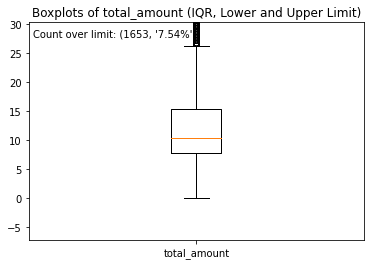

In [19]:
plt.boxplot(df1['total_amount'], labels=['total_amount'])
# Calculating quartiles
q1, q3 = np.percentile(df1['total_amount'], [25, 75])
iqr = q3 - q1
lower_limit = q1 - 1.5 * iqr
upper_limit = q3 + 1.5 * iqr
# Displaying only the interquartile range, lower limit, and upper limit
plt.gca().axes.set_ylim([lower_limit - 0.5 * iqr, upper_limit + 0.5 * iqr])
plt.title('Boxplots of total_amount (IQR, Lower and Upper Limit)')
# Filter the DataFrame for values exceeding the maximum limit and count them
count_over_limit = len(df1[df1['total_amount'] > upper_limit])
outliers_percentage=round(count_over_limit/len(df1)*100,2)
outliers_percentage=f'{outliers_percentage:.2f}%'
# Adding text annotation for count over the maximum limit
plt.text(0.5, 0.95, f'Count over limit: {count_over_limit,outliers_percentage}',
         horizontalalignment='right', verticalalignment='center', transform=plt.gca().transAxes)
count_over_limit

2167

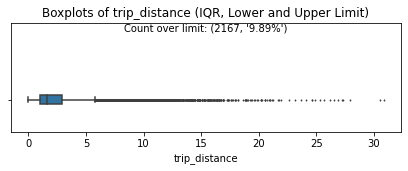

In [20]:
plt.figure(figsize=(7,2))
plt.title('trip_distance')
sns.boxplot(data=None, x=df1['trip_distance'], fliersize=1);
# Calculate quartiles and IQR
q1, q3 = np.percentile(df1['trip_distance'], [25, 75])
iqr = q3 - q1
lower_limit = q1 - 1.5 * iqr
upper_limit = q3 + 1.5 * iqr
# Displaying only the interquartile range, lower limit, and upper limit
plt.gca().axes.set_ylim([lower_limit - 0.5 * iqr, upper_limit + 0.5 * iqr])
plt.title('Boxplots of trip_distance (IQR, Lower and Upper Limit)')
# Filter the DataFrame for values exceeding the maximum limit and count them
count_over_limit = len(df1[df1['trip_distance'] > upper_limit])
outliers_percentage=round(count_over_limit/len(df1)*100,2)
outliers_percentage=f'{outliers_percentage:.2f}%'
# Adding text annotation for count over the maximum limit
plt.text(0.5, 0.95, f'Count over limit: {count_over_limit,outliers_percentage}',
         horizontalalignment='center', verticalalignment='center', transform=plt.gca().transAxes)
count_over_limit

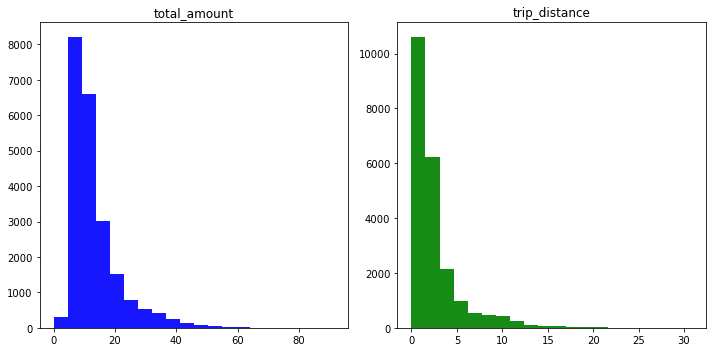

In [21]:
fig, axs = plt.subplots(1, 2, figsize=(10, 5))
axs[0].hist(df1['total_amount'] , bins=20, color='blue', alpha=0.7)
axs[0].set_title('total_amount')
axs[1].hist(df1['trip_distance'], bins=20, color='green', alpha=0.7)
axs[1].set_title('trip_distance')
# Plot first histogram
axs[0].hist(df1['total_amount'], bins=20, color='blue', alpha=0.7)
axs[0].set_title('total_amount')

# Plot second histogram
axs[1].hist(df1['trip_distance'], bins=20, color='green', alpha=0.7)
axs[1].set_title('trip_distance')

# Show the plot
plt.tight_layout()
plt.show()

##### The dataset has too many outliers (around ~10%)
##### We cannot eliminate all the outliers but we can find a suitable ML model that works well under such circumstances or use normalization procedures to skew the data to the middle.

In [22]:
# df1.to_csv(r"C:\Users\yorgh\Documents\Course Materials\Google Advanced Data Analytics Course\Datasets Exercise\Automatidata project\2017_Yellow_Taxi_Trip_CleanData.csv", index=False)

In [23]:
df1[(df1['PULocationID']==264)&(df1['DOLocationID']==264)]

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
188,70629213,1,2017-08-21 12:40:25,2017-08-21 13:12:31,3,15.20,1,N,264,264,1,42.5,0.0,0.5,5.00,0.0,0.3,43.3
272,19343693,1,2017-03-07 23:51:39,2017-03-07 23:57:50,1,2.10,1,N,264,264,1,8.0,0.5,0.5,1.85,0.0,0.3,9.3
443,1527719,1,2017-01-20 09:24:59,2017-01-20 09:33:01,1,0.70,1,N,264,264,2,6.5,0.0,0.5,0.00,0.0,0.3,7.3
610,35954440,1,2017-04-28 07:19:32,2017-04-28 07:28:08,1,1.20,1,N,264,264,1,7.5,0.0,0.5,1.65,0.0,0.3,8.3
662,79222561,1,2017-09-20 20:53:05,2017-09-20 20:57:30,1,0.80,1,N,264,264,1,5.0,0.5,0.5,1.26,0.0,0.3,6.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22313,93460410,1,2017-11-04 20:26:22,2017-11-04 20:44:52,2,2.10,1,N,264,264,1,13.0,0.5,0.5,1.50,0.0,0.3,14.3
22321,36584666,2,2017-04-30 11:45:51,2017-04-30 11:52:49,3,1.26,1,N,264,264,1,7.0,0.0,0.5,1.00,0.0,0.3,7.8
22390,8258447,1,2017-02-04 02:11:46,2017-02-04 02:23:22,1,2.20,1,N,264,264,2,10.0,0.5,0.5,0.00,0.0,0.3,11.3
22396,103207460,1,2017-12-06 12:26:03,2017-12-06 12:40:18,1,1.10,1,N,264,264,1,10.0,0.0,0.5,2.00,0.0,0.3,10.8


### Comments :
it is good to note that some trips had the same pick-up and drop-off location stating that thoses were round-trips and not trips taken from one destination to reach another. This information may come handy during the feature engineering process.